### Shallow Vs Deep Learning Methodology to Uncover patterns of Terrorism

In [83]:
# required modules 

In [84]:
# Data Libraries 
import pandas as pd 
import numpy as np

# plotting libraries 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns

#predictive modelling 
import sklearn 
from tensorflow.keras.layers import Dense, Activation, BatchNormalization

# ignore warnings 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [85]:
# data path 
# MacOS
abspath = '../Data/Data.csv'
metadata = '../Data/terrorism_metadata.csv'
# Windows 
# abspath = None
# metadata = None

In [86]:
# Functional Meta-Data --> usage - meta_data['column-name']
meta = pd.read_csv(metadata)
meta = meta.drop(meta.columns[2:],axis=1)
meta_data = {}
for x,y in zip(list(meta['Column']),list(meta['Desc'])):
    meta_data[x] = y

# meta_data

In [87]:
# Data 
data = pd.read_csv(abspath,encoding='latin1',low_memory=False)

In [88]:
data = data.drop('Unnamed: 0',axis=1) # dropping the redundant column

In [89]:
data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,...,target1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill,propextent
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,...,Julio Guzman,58.0,Dominican Republic,MANO-D,Unknown,NaN,13,Unknown,1.0,NaN
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Mexico city,...,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,Unknown,7.0,13,Unknown,0.0,NaN
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Unknown,...,Employee,217.0,United States,Unknown,Unknown,NaN,13,Unknown,1.0,NaN
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Athens,...,U.S. Embassy,217.0,United States,Unknown,Unknown,NaN,6,Explosives,NaN,NaN
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,U.S. Consulate,217.0,United States,Unknown,Unknown,NaN,8,Incendiary,NaN,NaN


<AxesSubplot:>

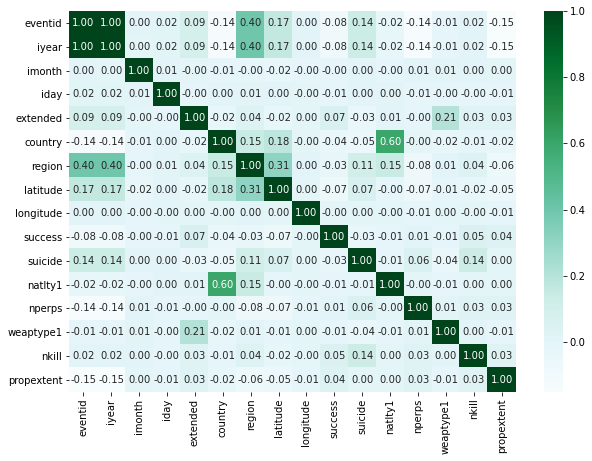

In [90]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, cmap='BuGn',fmt='.2f')

In [91]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'city', 'provstate', 'latitude',
       'longitude', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'motive', 'nperps', 'weaptype1', 'weaptype1_txt', 'nkill',
       'propextent'],
      dtype='object')

In [92]:
data = data.drop('eventid',axis=1)

<AxesSubplot:>

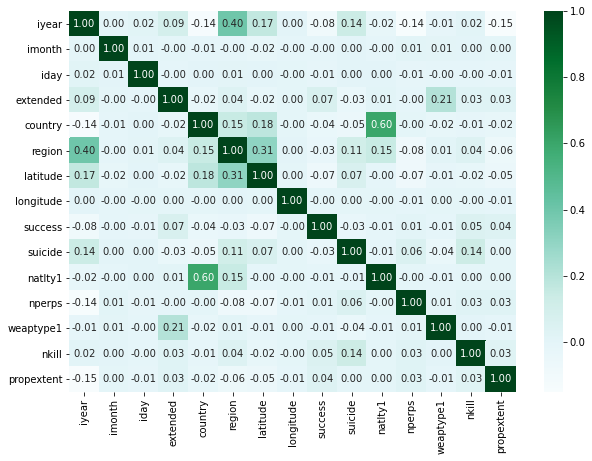

In [93]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, cmap='BuGn',fmt='.2f')

In [94]:
meta_data

{'eventid': 'Unique id for each event',
 'iyear': 'Year of incident',
 'imonth': 'Month of incident',
 'iday': 'Numeric day on which the incident occurred.',
 'extended': 'Yes/No for for whether the incedent extended for more than 24 hours.',
 'country': 'Country code',
 'country_txt': 'Country where the incident took place',
 'region ': 'Region code based on 12 regions.',
 'region_txt': 'Region in which the incident occurred',
 'city': 'Name of the city/village/town in which the incident took place.',
 'provstate': 'Name of the first order subnational region during the time of the event',
 'latitude': 'Coordinate',
 'longitude': 'Coordinate',
 'location': '*Exact* location where the incident took place',
 'summary': 'synopsis',
 'success': 'Yes/No for the success of the terrorist strike',
 'suicide': 'Yes/No for whether the attack was a suicide attack',
 'attacktype1_txt': 'The general method of attack/ the tactics used.',
 'targettype1_txt': 'The general category of victim of the att

In [95]:
data.head(4)

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,provstate,...,target1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill,propextent
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,Unknown,...,Julio Guzman,58.0,Dominican Republic,MANO-D,Unknown,NaN,13,Unknown,1.0,NaN
1,1970,0,0,0,130,Mexico,1,North America,Mexico city,Federal,...,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,Unknown,7.0,13,Unknown,0.0,NaN
2,1970,1,0,0,160,Philippines,5,Southeast Asia,Unknown,Tarlac,...,Employee,217.0,United States,Unknown,Unknown,NaN,13,Unknown,1.0,NaN
3,1970,1,0,0,78,Greece,8,Western Europe,Athens,Attica,...,U.S. Embassy,217.0,United States,Unknown,Unknown,NaN,6,Explosives,NaN,NaN


In [96]:
data.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'city', 'provstate', 'latitude', 'longitude',
       'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'motive', 'nperps', 'weaptype1', 'weaptype1_txt', 'nkill',
       'propextent'],
      dtype='object')

In [97]:
delcols = ['longitude','latitude','country_txt',
           'city','provstate','natlty1_txt'
            ,'propextent',
           'attacktype1_txt','targsubtype1_txt','corp1']

In [98]:
df = data.drop(delcols, axis=1)

In [99]:
df

,iyear,imonth,iday,extended,country,region,region_txt,success,suicide,targtype1_txt,target1,natlty1,gname,motive,nperps,weaptype1,weaptype1_txt,nkill
0,1970,7,2,0,58,2,Central America & Caribbean,1,0,Private Citizens & Property,Julio Guzman,58.0,MANO-D,Unknown,NaN,13,Unknown,1.0
1,1970,0,0,0,130,1,North America,1,0,Government (Diplomatic),"Nadine Chaval, daughter",21.0,23rd of September Communist League,Unknown,7.0,13,Unknown,0.0
2,1970,1,0,0,160,5,Southeast Asia,1,0,Journalists & Media,Employee,217.0,Unknown,Unknown,NaN,13,Unknown,1.0
3,1970,1,0,0,78,8,Western Europe,1,0,Government (Diplomatic),U.S. Embassy,217.0,Unknown,Unknown,NaN,6,Explosives,NaN
4,1970,1,0,0,101,4,East Asia,1,0,Government (Diplomatic),U.S. Consulate,217.0,Unknown,Unknown,NaN,8,Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,182,11,Sub-Saharan Africa,1,0,Military,Checkpoint,182.0,Al-Shabaab,Unknown,-99.0,5,Firearms,1.0
181687,2017,12,31,0,200,10,Middle East & North Africa,1,0,Military,Hmeymim Air Base,167.0,Muslim extremists,Unknown,-99.0,6,Explosives,2.0
181688,2017,12,31,0,160,5,Southeast Asia,1,0,Private Citizens & Property,Houses,160.0,Bangsamoro Islamic Freedom Movement (BIFM),Unknown,-99.0,8,Incendiary,0.0
181689,2017,12,31,0,92,6,South Asia,0,0,Government (General),Office,92.0,Unknown,Unknown,-99.0,6,Explosives,0.0


In [100]:
df.shape

(181691, 18)

In [101]:
df

,iyear,imonth,iday,extended,country,region,region_txt,success,suicide,targtype1_txt,target1,natlty1,gname,motive,nperps,weaptype1,weaptype1_txt,nkill
0,1970,7,2,0,58,2,Central America & Caribbean,1,0,Private Citizens & Property,Julio Guzman,58.0,MANO-D,Unknown,NaN,13,Unknown,1.0
1,1970,0,0,0,130,1,North America,1,0,Government (Diplomatic),"Nadine Chaval, daughter",21.0,23rd of September Communist League,Unknown,7.0,13,Unknown,0.0
2,1970,1,0,0,160,5,Southeast Asia,1,0,Journalists & Media,Employee,217.0,Unknown,Unknown,NaN,13,Unknown,1.0
3,1970,1,0,0,78,8,Western Europe,1,0,Government (Diplomatic),U.S. Embassy,217.0,Unknown,Unknown,NaN,6,Explosives,NaN
4,1970,1,0,0,101,4,East Asia,1,0,Government (Diplomatic),U.S. Consulate,217.0,Unknown,Unknown,NaN,8,Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,182,11,Sub-Saharan Africa,1,0,Military,Checkpoint,182.0,Al-Shabaab,Unknown,-99.0,5,Firearms,1.0
181687,2017,12,31,0,200,10,Middle East & North Africa,1,0,Military,Hmeymim Air Base,167.0,Muslim extremists,Unknown,-99.0,6,Explosives,2.0
181688,2017,12,31,0,160,5,Southeast Asia,1,0,Private Citizens & Property,Houses,160.0,Bangsamoro Islamic Freedom Movement (BIFM),Unknown,-99.0,8,Incendiary,0.0
181689,2017,12,31,0,92,6,South Asia,0,0,Government (General),Office,92.0,Unknown,Unknown,-99.0,6,Explosives,0.0


In [102]:
regions = list(df['region_txt'].unique())
print('Total regions {}'.format(regions.__len__()))
print(regions)

Total regions 12
['Central America & Caribbean', 'North America', 'Southeast Asia', 'Western Europe', 'East Asia', 'South America', 'Eastern Europe', 'Sub-Saharan Africa', 'Middle East & North Africa', 'Australasia & Oceania', 'South Asia', 'Central Asia']


In [103]:
# Segregating data according to regions
region_dfs = {}
for region in regions:
    region_dfs[region] = df[df['region_txt']==region]

In [104]:
datasheet = df.drop('gname',axis=1)

In [105]:
# finding out amount of data that exists for each region
region_qdata = {}
for region, df in zip(region_dfs.keys(),region_dfs.values()):
    print(f'{region.upper()}',end=' ')
    print(df.shape)
    region_qdata[df.shape[0]] = region
    

CENTRAL AMERICA & CARIBBEAN (10344, 18)
NORTH AMERICA (3456, 18)
SOUTHEAST ASIA (12485, 18)
WESTERN EUROPE (16639, 18)
EAST ASIA (802, 18)
SOUTH AMERICA (18978, 18)
EASTERN EUROPE (5144, 18)
SUB-SAHARAN AFRICA (17550, 18)
MIDDLE EAST & NORTH AFRICA (50474, 18)
AUSTRALASIA & OCEANIA (282, 18)
SOUTH ASIA (44974, 18)
CENTRAL ASIA (563, 18)


In [106]:
# considering only the regions with higher datapoints for more predictability 
final_dfs={}
for qty,region in zip(region_qdata.keys(),region_qdata.values()):
    if qty > 10**4:
        final_dfs[region] = region_dfs[region]
    

In [116]:
# Need to generalise the numerous other classes and aggregate them into one category 
# Need to check for class imbalance